In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nlte

from utils import *

In [2]:
population_nlte_1 = [0.0 for _ in range(52)]; population_nlte_1[0] = 1.0

count = int(100)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e30, num=count)

In [3]:
b_factors = calculate_b_factors(
    population_nlte_1,
    temperatures,
    electron_temperatures,
    electron_number_densities,
)

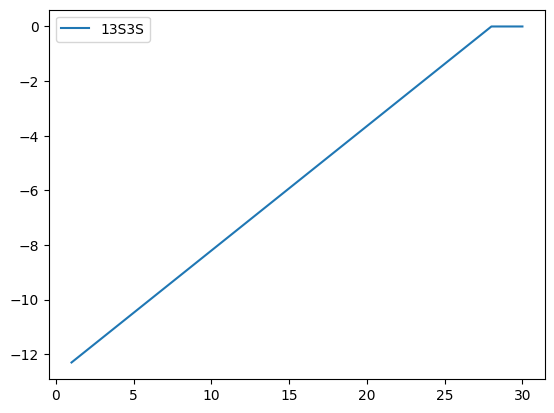

In [4]:
# 13S3S - fast level
for i, key in enumerate(nlte.Oxygen.keys[4:5]):
    plt.plot(
        np.log10(electron_number_densities),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()

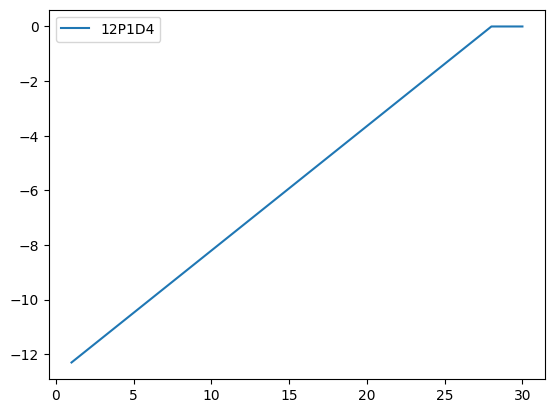

In [5]:
# 12P1D4
for i, key in enumerate(nlte.Oxygen.keys[1:2]):
    plt.plot(
        np.log10(electron_number_densities),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()

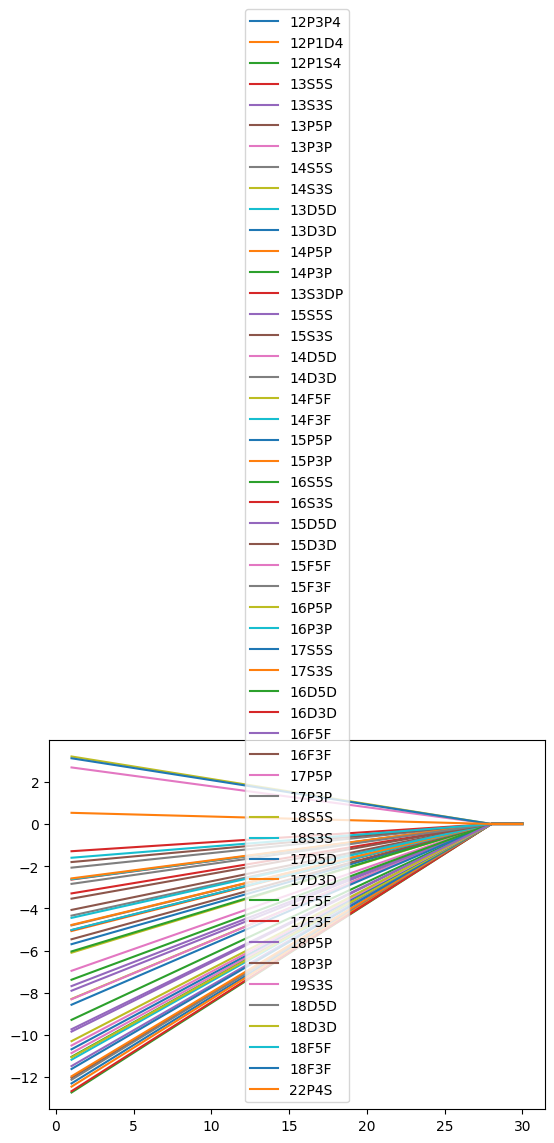

In [6]:
for i, key in enumerate(nlte.Oxygen.keys):
    plt.plot(
        np.log10(electron_number_densities),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()